# Постановка задачи

В таблице указаны супергерои и их данные. Нужно узнать:
1. Какой издатель, Marvel Comics и DC Comics, имеет больше всего героев.
2. Кого в этой таблице больше, героев или злодеев?
3. Узнать кого больше, мужчин или женщин.
4. Посмотреть, есть ли зависимости веса и роста от расы, цвета глаз, цвета волос

# Подключение библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [3]:
df = pd.read_excel('1_heroes_information.xlsx')

In [4]:
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


Столбец с название "Unnamed: 0" можно переименовать в "ID hero"

In [5]:
df = df.rename(columns={'Unnamed: 0': 'ID hero'})
df.head()

,ID hero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


# Описание данных

Признаки:
- ID - номер строки в таблице
- name - имя героя
- gender - пол героя 
- Eye color - цвет глаз героя
- Race - раса героя
- Hair color - цвет волос героя
- Height - рост
- Publisher - где публиковался
- skin color - цвет кожи
- alignment - на какой стороне герой (хороший/плохой)
- Weight - вес героя

In [6]:
df.shape

(734, 11)

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID hero     734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [8]:
df.describe()

,ID hero,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


В наборе данных содержится 734 наблюдения и 11 признаков. Наблюдаются пропущенные и аномальные значения. 

# Разведочный анализ данных(EDA)

### Проверка на пропущенные, дублирующие и аномальные записи

In [9]:
df.isna().sum()

ID hero        0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

Все записи уникальные, но есть пропущенные значения

In [11]:
df =df.dropna()
df.isna().sum()

ID hero       0
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

Теперь пропущенные значения отсутствуют

In [12]:
df.describe()

,ID hero,Height,Weight
count,719.000000,719.000000,719.000000
mean,367.877608,104.436718,46.184979
std,212.774166,139.101156,130.675492
min,0.000000,-99.000000,-99.000000
25%,183.500000,-99.000000,-99.000000
50%,369.000000,175.000000,63.000000
75%,552.500000,186.500000,91.000000
max,733.000000,975.000000,900.000000


In [13]:
df['Height'] = df['Height'].replace(-99, 0)
df['Weight'] = df['Weight'].replace(-99, 0)
df.describe()

,ID hero,Height,Weight
count,719.000000,719.000000,719.000000
mean,367.877608,133.076495,77.165508
std,212.774166,98.478653,100.885849
min,0.000000,0.000000,0.000000
25%,183.500000,0.000000,0.000000
50%,369.000000,175.000000,63.000000
75%,552.500000,186.500000,91.000000
max,733.000000,975.000000,900.000000


Вместо значений "-99" теперь будут значения "0"

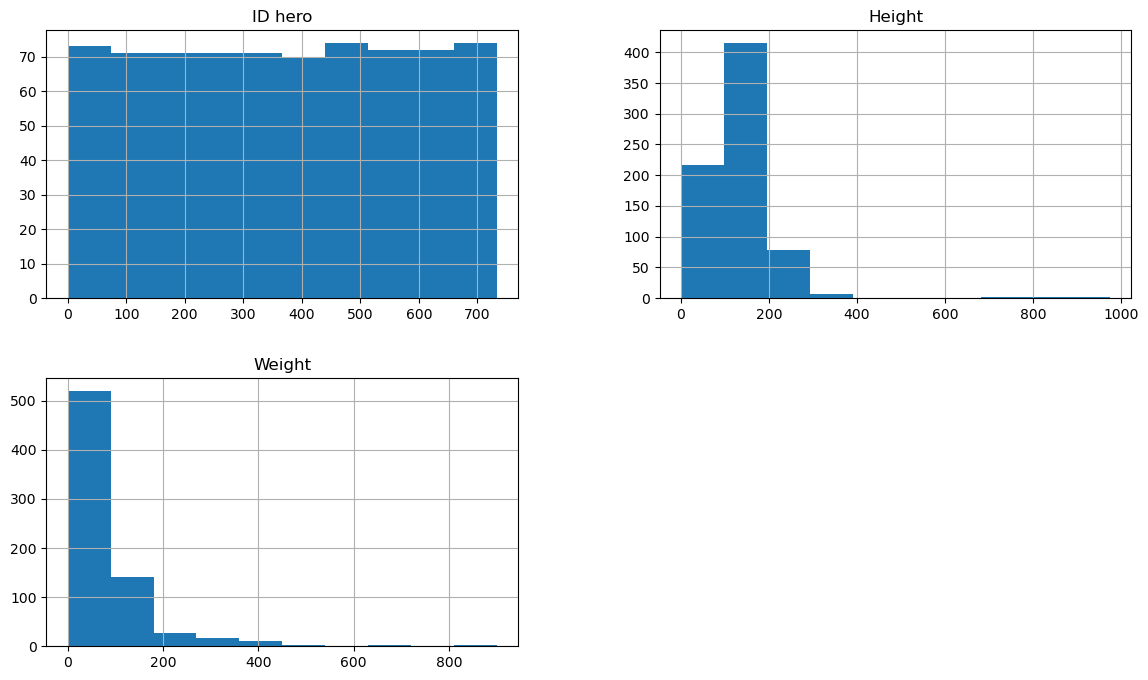

In [14]:
df.hist(figsize=(14, 8));

In [15]:
df["Publisher"].value_counts()

Publisher
Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
South Park             1
Universal Studios      1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

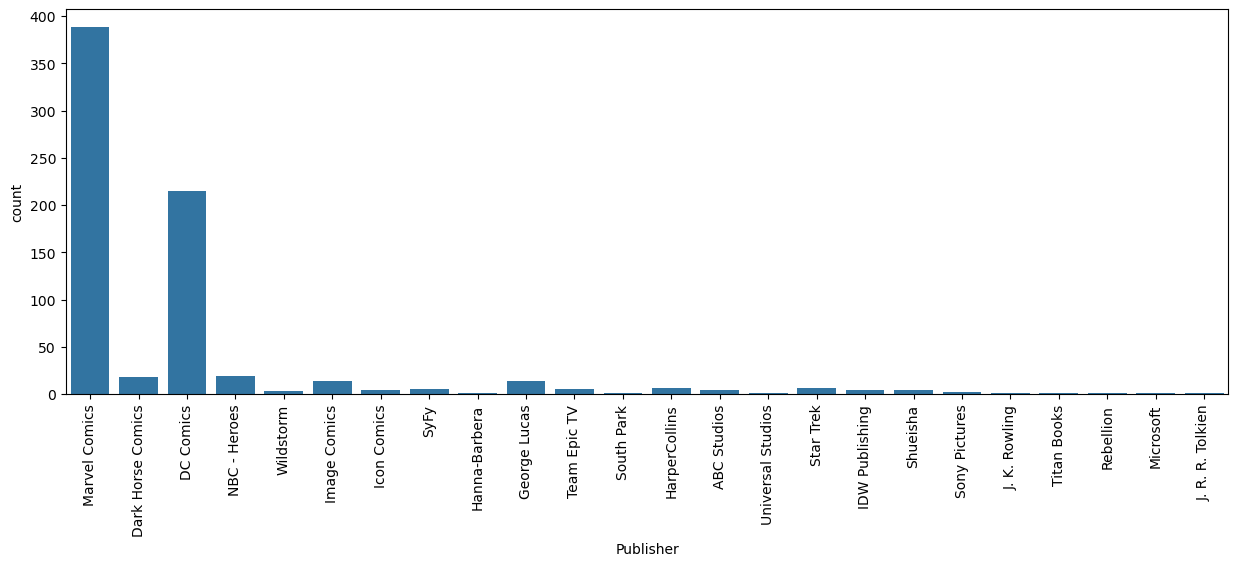

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x="Publisher");
plt.xticks(rotation=90);

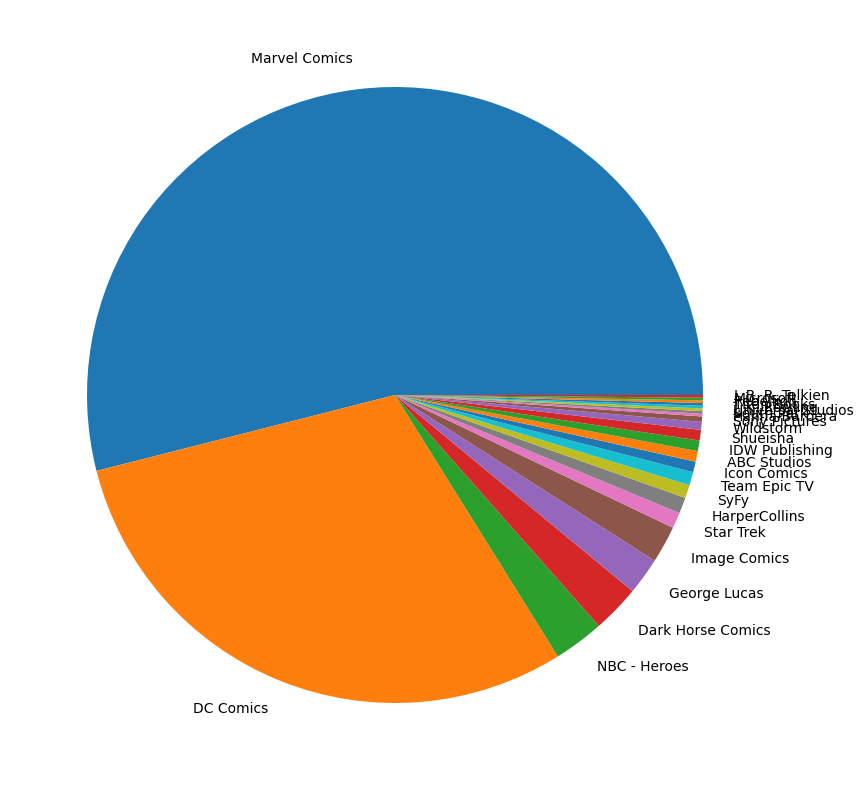

In [17]:
plt.figure(figsize=(10, 10))
plt.pie(df["Publisher"].value_counts(), labels=df["Publisher"].value_counts().index);

##### Персонажей больше у Marvel Comics на целых 173!

In [18]:
df["Alignment"].value_counts()

Alignment
good       484
bad        205
neutral     24
-            6
Name: count, dtype: int64

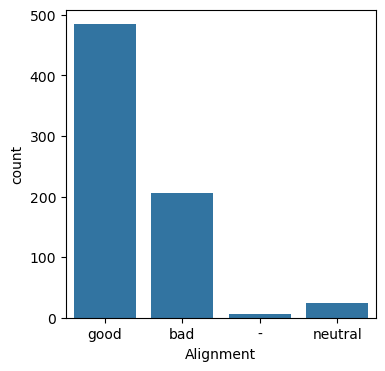

In [19]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="Alignment");

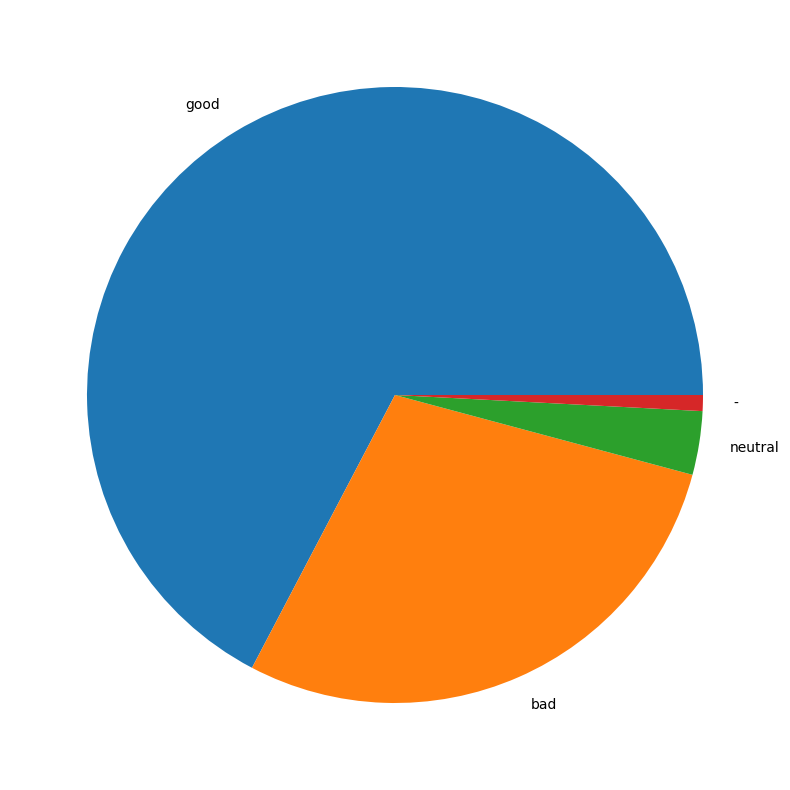

In [20]:
plt.figure(figsize=(10, 10))
plt.pie(df["Alignment"].value_counts(), labels=df["Alignment"].value_counts().index);

##### Хороших персонажей больше на целых 279!

In [21]:
df["Gender"].value_counts()

Gender
Male      494
Female    198
-          27
Name: count, dtype: int64

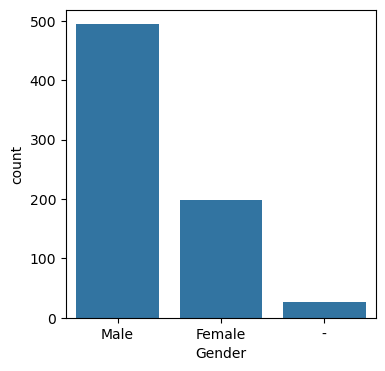

In [22]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x="Gender");

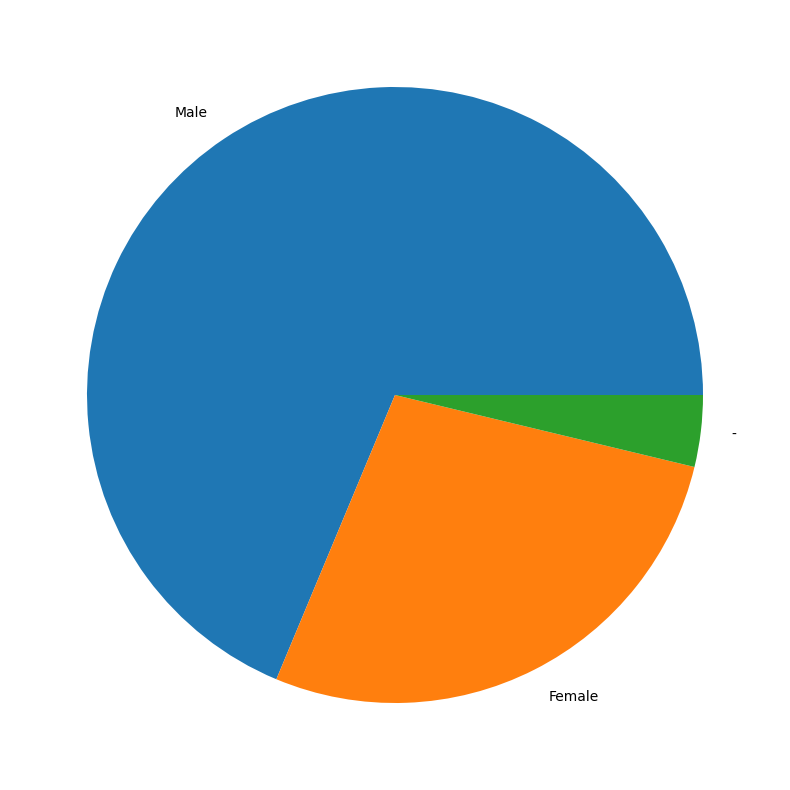

In [23]:
plt.figure(figsize=(10, 10))
plt.pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index);

Мужчин больше на целых 296!

In [24]:
df["Race"].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Saiyan', 'Gorilla', 'Rodian',
       'Flora Colossus', 'Human-Vuldarian', 'Asgardian', 'Demi-God',
       'Eternal', 'Gungan', 'Bolovaxian', 'Animal', 'Czarnian', 'Martian',
       'Spartoi', 'Planet', 'Luphomoid', 'Parademon', 'Yautja', 'Maiar',
       'Clone', 'Talokite', 'Korugaran', 'Zombie', 'Human-Vulcan',
       'Human-Spartoi', 'Tamaranean', 'Frost Giant', 'Mutant / Clone',
       "Yoda's species"], dtype=object)

In [25]:
unique_races = df['Race'].unique()
race_mapping = {race: idx for idx, race in enumerate(unique_races)}
df['ID_Race'] = df['Race'].map(race_mapping)

In [26]:
df.head(10)

,ID hero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,ID_Race
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,3
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,4
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,0
6,6,Adam Monroe,Male,blue,-,Blond,0.0,NBC - Heroes,-,good,0.0,5
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,5
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,0


In [27]:
unique_eyes = df['Eye color'].unique()
eye_mapping = {eye: idx for idx, eye in enumerate(unique_eyes)}
df['ID_Eyes'] = df['Eye color'].map(eye_mapping)

In [28]:
df.head(10)

,ID hero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,ID_Race,ID_Eyes
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0,0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1,1
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2,1
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,3,2
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,4,1
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,0,1
6,6,Adam Monroe,Male,blue,-,Blond,0.0,NBC - Heroes,-,good,0.0,5,1
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,0,1
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,5,1
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,0,3


In [29]:
unique_hairs = df['Hair color'].unique()
hair_mapping = {hair: idx for idx, hair in enumerate(unique_hairs)}
df['ID_Hairs'] = df['Hair color'].map(hair_mapping)

In [30]:
df.head(10)

,ID hero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,ID_Race,ID_Eyes,ID_Hairs
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0,0,0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1,1,0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2,1,0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,3,2,0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,4,1,1
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0,0,1,0
6,6,Adam Monroe,Male,blue,-,Blond,0.0,NBC - Heroes,-,good,0.0,5,1,2
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0,0,1,2
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0,5,1,2
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0,0,3,3


In [31]:
df_corr = df[['ID hero', 'Height', 'Weight', 'ID_Race', 'ID_Eyes', 'ID_Hairs']].corr()
df_corr

,ID hero,Height,Weight,ID_Race,ID_Eyes,ID_Hairs
ID hero,1.000000,0.033295,0.046829,0.151522,0.099339,0.005702
Height,0.033295,1.000000,0.486497,0.112416,-0.054763,0.015585
Weight,0.046829,0.486497,1.000000,0.092087,-0.042879,0.022617
ID_Race,0.151522,0.112416,0.092087,1.000000,0.056277,-0.042273
ID_Eyes,0.099339,-0.054763,-0.042879,0.056277,1.000000,-0.053281
ID_Hairs,0.005702,0.015585,0.022617,-0.042273,-0.053281,1.000000


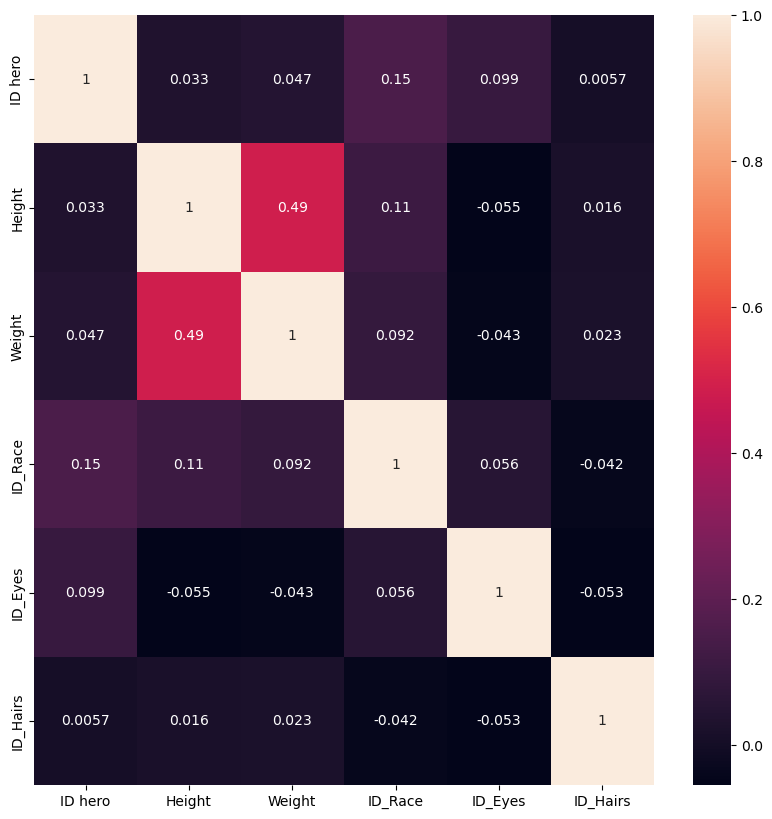

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True);

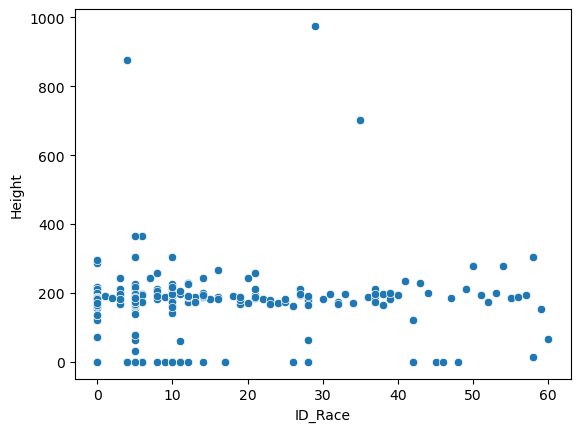

In [33]:
sns.scatterplot(data=df, x="ID_Race", y="Height");

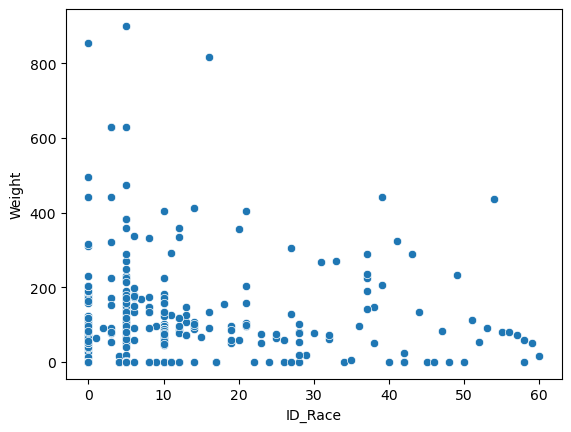

In [34]:
sns.scatterplot(data=df, x="ID_Race", y="Weight");

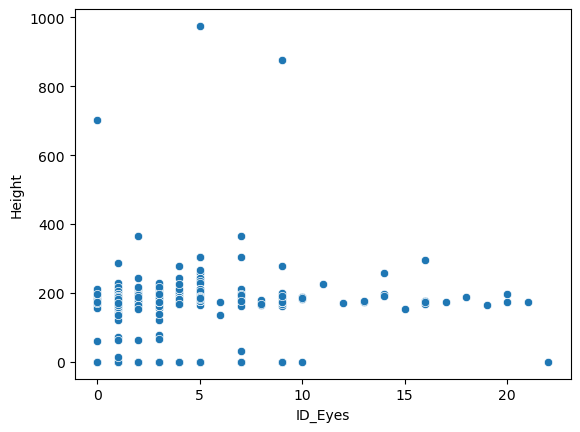

In [35]:
sns.scatterplot(data=df, x="ID_Eyes", y="Height");

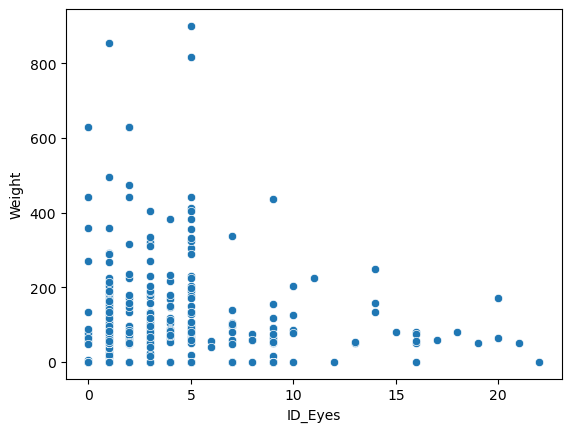

In [36]:
sns.scatterplot(data=df, x="ID_Eyes", y="Weight");

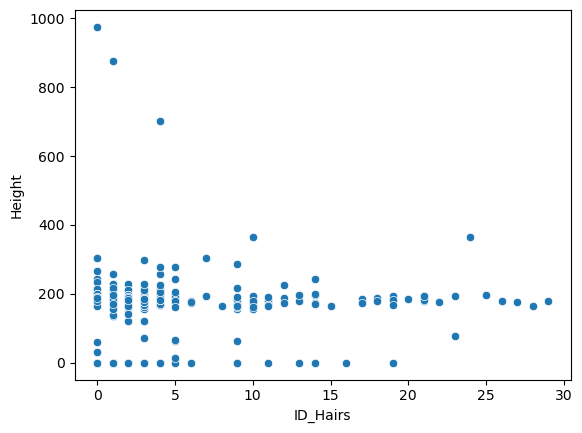

In [37]:
sns.scatterplot(data=df, x="ID_Hairs", y="Height");

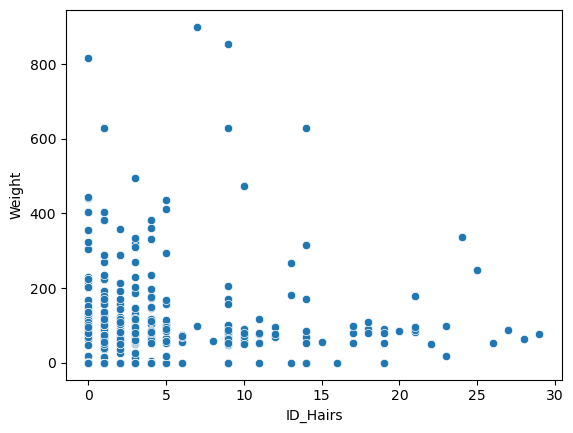

In [38]:
sns.scatterplot(data=df, x="ID_Hairs", y="Weight");

##### Была замечана некоторая зависимость у веса от всех трех параметров: чем меньше ID расы, тем выше средний вес. У роста зависимость не была замечена.

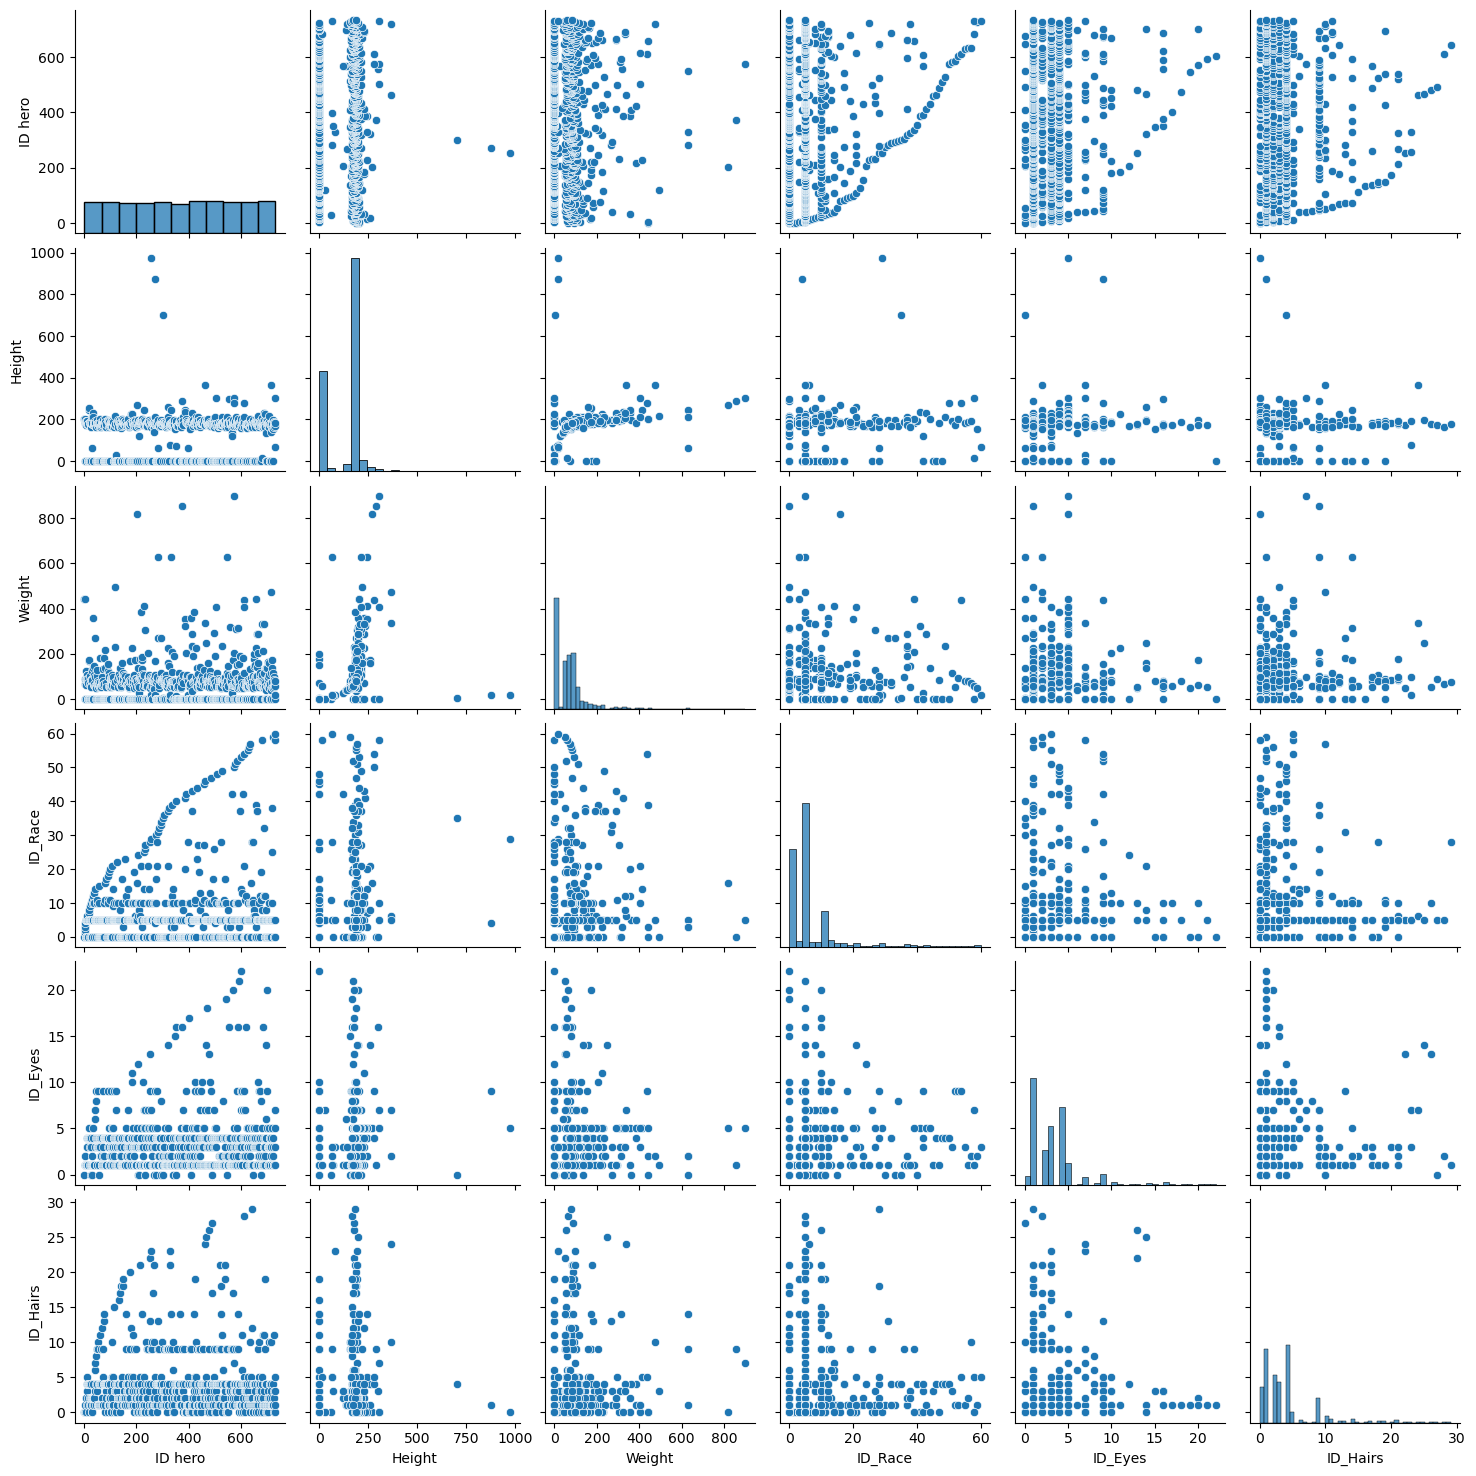

In [40]:
sns.pairplot(data=df)